In [1]:
import matplotlib.pyplot as plt

In [2]:
from abupy import ABuSymbolPd
tsla_df = ABuSymbolPd.make_kl_df('usTSLA', n_folds = 2)
tsla_df.tail()

,close,high,low,p_change,open,pre_close,volume,date,date_week,atr21,atr14,key
2018-12-24,295.39,314.50,295.195,-7.624,313.5,319.77,5559913,20181224,0,18.7935,19.6343,440
2018-12-26,326.09,326.97,294.090,10.393,300.0,295.39,8163138,20181226,2,20.0741,21.4004,441
2018-12-27,326.09,326.97,294.090,0.000,300.0,326.09,8163138,20181227,3,21.2382,22.9310,442
2018-12-28,326.09,326.97,294.090,0.000,300.0,326.09,8163138,20181228,4,22.2966,24.2575,443
2018-12-31,326.09,326.97,294.090,0.000,300.0,326.09,8163138,20181231,0,23.2587,25.4072,444


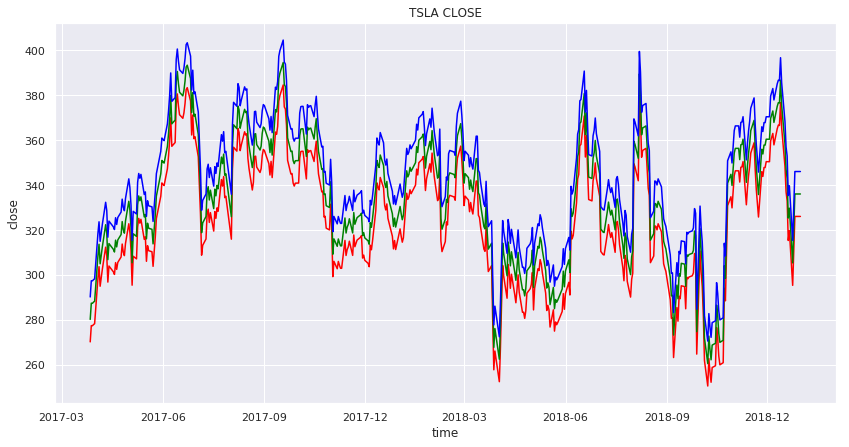

In [4]:
def plot_demo(axs = None, just_series = False):
    drawer = plt if axs is None else axs
    drawer.plot(tsla_df.close, c = 'r')
    if not just_series:
        drawer.plot(tsla_df.close.index, tsla_df.close.values + 10, c = 'g')
        drawer.plot(tsla_df.close.index.tolist(), (tsla_df.close.values + 20).tolist(), c = 'b')
    plt.xlabel('time')
    plt.ylabel('close')
    plt.title('TSLA CLOSE')
    plt.grid(True)
plot_demo()

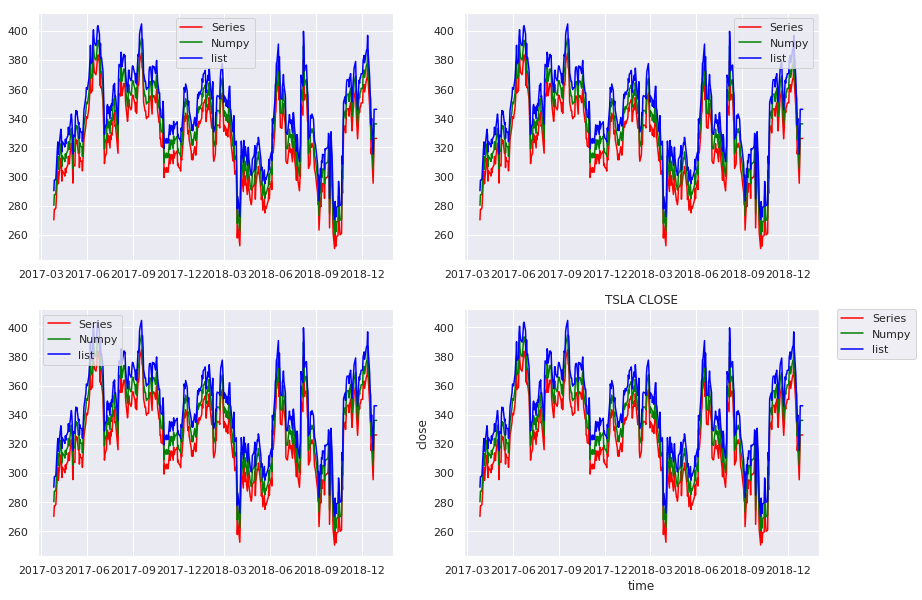

In [10]:
_, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (14, 10))
drawer = axs[0][0]
plot_demo(drawer)
drawer.legend(['Series', 'Numpy', 'list'], loc = 0)
drawer = axs[0][1]
plot_demo(drawer)
drawer.legend(['Series', 'Numpy', 'list'], loc = 1)
drawer = axs[1][0]
plot_demo(drawer)
drawer.legend(['Series', 'Numpy', 'list'], loc = 2)
drawer = axs[1][1]
plot_demo(drawer)
drawer.legend(['Series', 'Numpy', 'list'], bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)

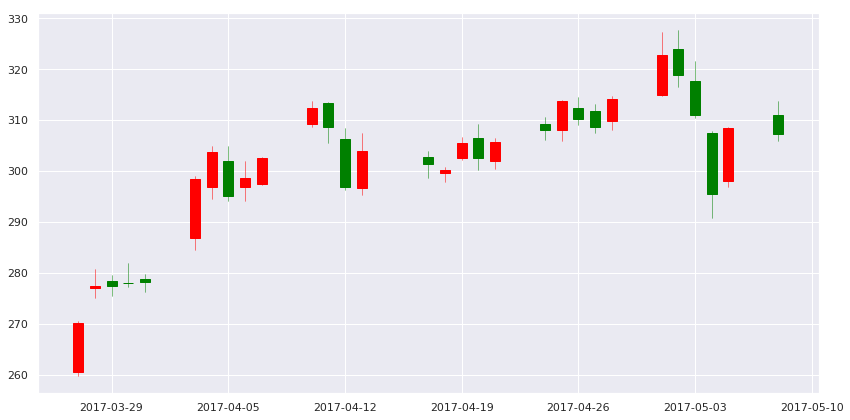

In [13]:
import mpl_finance as mpf
import matplotlib as mpl
__colorup__ = "red"
__colordown__ = "green"
tsla_part_df = tsla_df[:30]
fig, ax = plt.subplots(figsize = (14, 7))
qutotes = []
for index, (d, o, c, h, l) in enumerate(zip(tsla_part_df.index, tsla_part_df.open, tsla_part_df.close, tsla_part_df.high, tsla_part_df.low)):
    d = mpl.dates.date2num(d)
    val = (d, o, c, h, l)
    qutotes.append(val)
mpf.candlestick_ochl(ax, qutotes, width = 0.6, colorup = __colorup__, colordown = __colordown__)
ax.autoscale_view()
ax.xaxis_date()